<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/NLP/Sentiment_Analysis_Using_BERT_PART_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Guide To Sentiment Analysis Using BERT](https://analyticsindiamag.com/guide-to-sentiment-analysis-using-bert/) 10/07/2021

In [ ]:
# Google provides APIs to easily crawl the PlayStore for Python 
# without any external dependencies 
!pip install -qq google-play-scraper

     |████████████████████████████████| 61kB 3.2MB/s 


In [ ]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

# Pygments is a syntax highlighting package suitable for code hosting, forums
from pygments import highlight
# JsonLexer for parsing JSOn files
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
app_packages = [
  'com.anydo',
  'com.todoist',      
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

## Usage of the google-play-scraper

In [ ]:
from google_play_scraper import app
result = app('com.todoist',
            lang = 'en',    # default is 'en'
            country = 'us') # default is 'us'

In [ ]:
result

{'adSupported': None,
 'androidVersion': 'Varies',
 'androidVersionText': 'Varies with device',
 'appId': 'com.todoist',
 'comments': [],
 'containsAds': False,
 'contentRating': 'Everyone',
 'contentRatingDescription': None,
 'currency': 'USD',
 'description': '🏆 <b>2020 Editor\'s Choice</b> by Google\r\n🥇 "<b>Todoist is the best to-do list app right now</b>" - The Verge\r\n\r\nTodoist is used by 20 million people to organize, plan and collaborate on projects, both big and small.\r\n\r\nUse Todoist to:\r\n• Capture and organize tasks the moment they pop into your head.\r\n• Remember deadlines with reminders and due dates. \r\n• Build lasting habits with recurring due dates like "every Monday".\r\n• Organize your projects in kanban style with Boards.\r\n• Collaborate on projects by assigning tasks to others.\r\n• Prioritize your tasks with priority levels.\r\n• Track your progress with personalized productivity trends.\r\n• Integrate your tools like Gmail, Google Calendar, Slack, Amazo

## Scraping App Information
Let's scrape the info for each app:

In [ ]:
len(app_packages)

15

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']   # Deleting the comment information from the json obtained.
  app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str         # Some date time and other formats are also converted into string while printing
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))  # Terminal formatter to highlight the different objects

In [ ]:
print_json(app_infos[0])   # Can also spot some bool values.

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support 

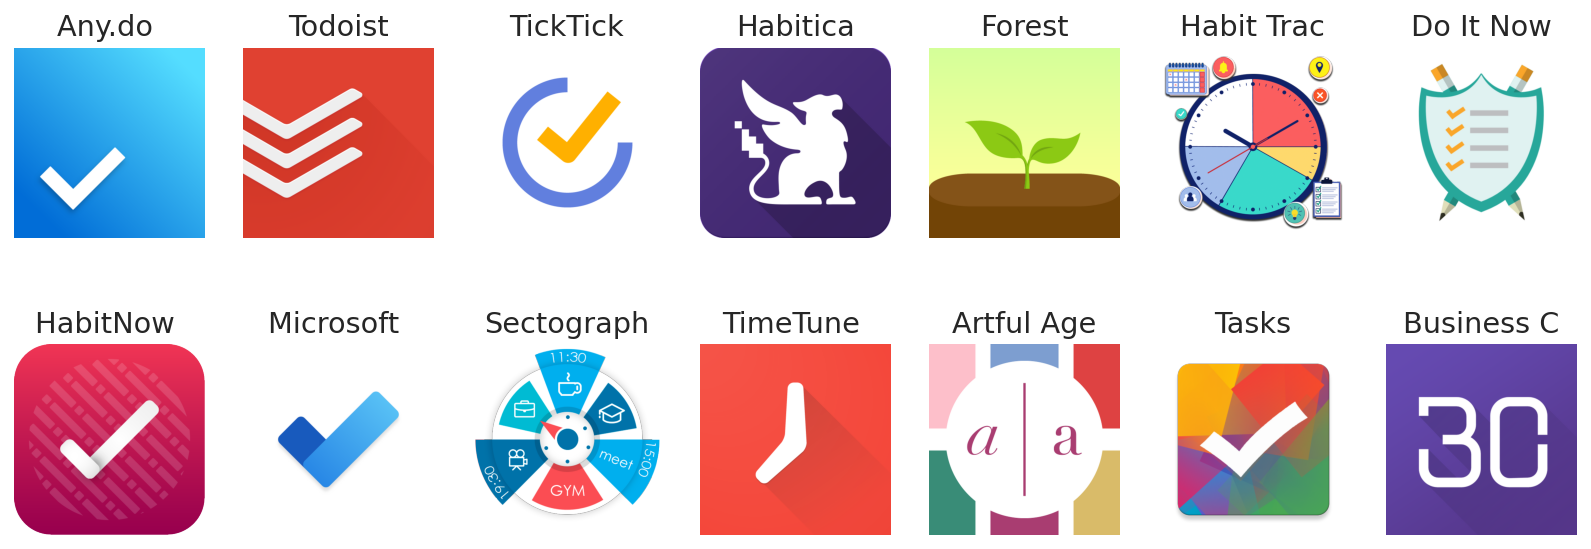

In [ ]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')  #Find the index of ':' or '-' else return -1.
  #print(sep_index)
  if sep_index != -1:
    title = title[:sep_index]   # Strip the unnecessary charecters after the ':' and '-'.
  return title[:10]             # if there are no ':' or '-' return only first 10 charecters of the title.

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title((format_title(ai['title'])))   # Format title fits the title and removes junk charecters
  ax.axis('off')

Store the app information for later by converting the JSON objects into a Pandas dataframe and saving the result into a CSV file:

In [ ]:
app_infos_df = pd.DataFrame(app_infos)   # Converts the list of json objects and converts to dataframe object.
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [ ]:
app_infos_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,"Any.do - To do list, planner & calendar","🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,4.448284,383621,132359,"[25423, 8860, 18740, 45892, 284706]",0,True,USD,False,None,None,None,True,$0.99 - $83.88 per item,Varies with device,Varies,Varies with device,Any.do To-do list & Calendar,5304780265295461149,feedback+androidtodo@any.do,https://www.any.do,"Any.do Inc.\n\n156 Begin St. 22nd floor, Tel A...",https://www.any.do/privacy,5304780265295461149,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/zgOLUXCH...,https://play-lh.googleusercontent.com/umhDP6ph...,[https://play-lh.googleusercontent.com/cGoZDZR...,None,None,Everyone,None,None,False,"Nov 10, 2011",1625481773,Varies with device,"- Dark mode is finally here, hooray! \r\n- Rec...","- Dark mode is finally here, hooray! <br>- Rec...",False,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2020 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2020 Editor&#39;s Choice</b> by Google<br...,“The best to-do list app right now” - The Verg...,“The best to-do list app right now” - The Verg...,"10,000,000+",10000000,4.543377,227073,68695,"[10149, 3789, 8249, 35219, 169667]",0,True,USD,False,None,None,None,True,$0.99 - $36.00 per item,Varies with device,Varies,Varies with device,Doist,6748661820728732000,support@todoist.com,http://todoist.com,"Doist\n201 Mission Street, Suite 1200\nSan Fra...",https://todoist.com/privacy,6748661820728732000,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/GK0SwEBV...,https://play-lh.googleusercontent.com/sAjzU1fU...,[https://play-lh.googleusercontent.com/cealfl9...,None,None,Everyone,None,None,False,"Nov 18, 2012",1625692546,Varies with device,Say goodbye to bugs and hello to brilliance. T...,Say goodbye to bugs and hello to brilliance. T...,True,com.todoist,https://play.google.com/store/apps/details?id=...
2,"TickTick: ToDo List Planner, Reminder & Calendar",🥇<b>Great to-do list app for new Android devic...,🥇<b>Great to-do list app for new Android devic...,Task & time manager by Editor’s Choice🏆. Get t...,Task &amp; time manager by Editor’s Choice🏆. G...,"1,000,000+",1000000,4.604039,81311,29673,"[3125, 1353, 2886, 9863, 64084]",0,True,USD,False,None,None,None,True,$0.99 - $27.99 per item,Varies with device,Varies,Varies with device,Appest Inc.,7269704759597705101,ticktick.com@gmail.com,https://ticktick.com,2035 Sunset Lake Road\nNewark\nDelaware\nUS,https://ticktick.com/about/privacy,7269704759597705101,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/YSlqf3WB...,https://play-lh.googleusercontent.com/m-kwaaJE...,[https://play-lh.googleusercontent.com/32pfblb...,None,None,Everyone,None,None,False,"Jun 19, 2013",1625468366,Varies with device,🛠️ Other improvements and bug fixes for a smoo...,🛠️ Other improvements and bug fixes for a smoo...,True,com.ticktick.task,https://play.google.com/store/apps/details?id=...
3,Habitica: Gamify Your Tasks,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,"1,000,000+",1000000,4.254703,19618,8137,"[1446, 887, 1556, 3062, 12667]",0,True,USD,False,None,None,None,

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):       
  # To iterate over ratings 1 to 5 seperately.
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:   
    # Sort the most relevant and newest.
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,        # Get 200 3 rated reviews and 100 each of others.
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest' # Store the sort order.
        r['appId'] = ap  # Store the app id.
      app_reviews.extend(rvs)  # Extend the reviws to contain information about sort order and app id

100%|██████████| 15/15 [01:05<00:00,  4.35s/it]


In [ ]:
# Sample review
print_json(app_reviews[0]) # Contains replies from the creators which is not so very useful.

{
  "appId": "com.anydo",
  "at": "2021-06-24 12:35:20",
  "content": "As like every other App. They want your money. Why, because they can! Because every other app charges. This one wants $3 per month or all you can do is 2 events per day. Don't fall for it keep searching. I might have considered paying if it was 3 dollars per year. If money doesn't bother you, then this app is fairly easy to use. Very intuitive and user friendly although I have used others under the Apple platform that were much better.",
  "repliedAt": "2021-06-27 15:04:33",
  "replyContent": "90% of the app is completely free, including all core functionality, and unlike similar apps, we allow our users to enjoy most of the features for as long and as much as they wish without any 3rd party ads or a requirement to upgrade :)\n\n",
  "reviewCreatedVersion": "5.14.2.5",
  "reviewId": "gp:AOqpTOF3BBW6LGgIs0svMJpnKnst1lsDpoh0ZjPpcxm7SJFU4LFa9Z7XMcBbpNcPI0jK-IfhX3F55D_GqUqocA",
  "score": 1,
  "sortOrder": "most_relevan

Let's save the reviews to a CSV file:

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)
app_reviews_df.shape

(16420, 12)

In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOF3BBW6LGgIs0svMJpnKnst1lsDpoh0ZjPpcxm...,Claude Smoot,https://play-lh.googleusercontent.com/a-/AOh14...,As like every other App. They want your money....,1,31,5.14.2.5,2021-06-24 12:35:20,"90% of the app is completely free, including a...",2021-06-27 15:04:33,most_relevant,com.anydo
1,gp:AOqpTOGgpF0Qjaitvi19zsNvTBLHGmLQXt5NDVQQ0UM...,Juliana Claps,https://play-lh.googleusercontent.com/a/AATXAJ...,"This keeps crashing, freezing, not responding....",1,8,5.14.2.6,2021-07-03 14:50:08,We're sorry to hear you're experiencing issues...,2021-07-04 09:36:49,most_relevant,com.anydo
2,gp:AOqpTOF04AnjWDqCqPw3UxsSSEWJqM1c3JblBFwsMc3...,Naman Dubey,https://play-lh.googleusercontent.com/a-/AOh14...,I am not getting reminders in my phone. Tried ...,1,0,5.14.2.5,2021-07-02 04:29:04,As long as you’ve turned your reminders ON and...,2021-07-04 09:20:49,most_relevant,com.anydo
3,gp:AOqpTOFPuTz3z9qTwUpM9QJOX77baUesnI-CtW7pecU...,Brad Betts,https://play-lh.googleusercontent.com/a-/AOh14...,This app implied that it had better integratio...,1,77,5.14.1.2,2021-06-01 00:50:22,Our Help Center https://bit.ly/3c8a3yX provide...,2021-06-01 08:24:43,most_relevant,com.anydo
4,gp:AOqpTOHCgsbGpZHpflISF-U3PRKnunyfB1BkhN73nep...,Wanie,https://play-lh.googleusercontent.com/a-/AOh14...,"I've used this before and dumped it, and I gav...",1,63,5.14.0.7,2021-04-29 08:26:50,"Hey, you can simply swipe it back from right t...",2021-04-29 10:05:58,most_relevant,com.anydo
